<a href="https://colab.research.google.com/github/Adriana-FLW/MBA_TCC/blob/main/03_Preparacao_BD_2018_Novo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENEM 2018**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Análises**

1. Target: Sum_Target_2

   Alto Desempenho: Estar acima da mediana em pelo menos 3 competências


2. Target: Target_Media

  Alto Desempenho: Estar acima da mediana da média das cinco competências
  

# **Bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import random as rd


# Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Fine-tuning de hiper-parâmetros
from sklearn.model_selection import GridSearchCV

# Gradiente Boosting
from sklearn.ensemble import GradientBoostingClassifier

# LightGBM
from lightgbm import LGBMClassifier

# Seleção de Variáveis Independentes Relevantes
from sklearn.feature_selection import SelectKBest, chi2

# Split
from sklearn.model_selection import train_test_split

# Regressão Logistica
from sklearn.linear_model import LogisticRegression

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# XGBoost
from xgboost import XGBClassifier

# kNN
from sklearn.neighbors import KNeighborsClassifier

# Pre Processamento
from sklearn.preprocessing import LabelEncoder

# Validação
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

# Validação Cruzada
from sklearn.model_selection import StratifiedKFold

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# **Importar Base**

In [ ]:
df_ft_categ_2018 = pd.read_csv('/content/drive/MyDrive/MBA_TCC/DADOS/df_ft_2018_categ.csv',sep=',',encoding='ISO-8859-1')
df_ft_categ_2018.shape

(3369104, 60)

# **Alteração do Índice**

In [ ]:
def f_alteracao_indice(df):
  df_altind = df.set_index('NU_INSCRICAO')
  return df_altind

df_altind = f_alteracao_indice(df_ft_categ_2018)
df_altind.sort_index()
df_altind.head()

,NU_ANO,TP_SEXO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_LOCALIZACAO_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,...,Q005_,Q006_,Q012_,Q013_,Q014_,Q015_,Q016_,Q017_,Q019_,Q024_
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
180007186625,2018,F,1500800.0,Ananindeua,PA,1,1500800.0,Ananindeua,PA,534.2,...,1,6,1,2,1,1,2,1,3,3
180007186627,2018,F,-1.0,-1,-1,-1,1503200.0,IgarapÃÂÃÂ©-AÃÂÃÂ§u,PA,506.9,...,1,2,2,1,1,1,1,1,2,1
180007186628,2018,M,3155603.0,Rio Pardo de Minas,MG,1,3155603.0,Rio Pardo de Minas,MG,470.6,...,4,2,2,1,1,1,1,1,2,1
180007186629,2018,F,1500800.0,Ananindeua,PA,1,1500800.0,Ananindeua,PA,588.9,...,1,7,2,1,2,1,1,1,3,1
180007186631,2018,F,-1.0,-1,-1,-1,2610905.0,Pesqueira,PE,477.8,...,1,3,2,1,1,1,1,1,2,2


# **Inclusão do Target 2**

In [ ]:
df_altind['Media_Notas'] = (df_altind.NU_NOTA_CN +
                            df_altind.NU_NOTA_CH +
                            df_altind.NU_NOTA_LC +
                            df_altind.NU_NOTA_MT +
                            df_altind.NU_NOTA_REDACAO)/5
df_altind['Target_Media'] = np.where(df_altind['Media_Notas'] > np.median(df_altind.Media_Notas), 1, 0)

In [ ]:
tb1 = pd.crosstab(df_altind.Sum_Target_2,df_altind.Target_Media, margins=True, dropna=False)
display(tb1)

Target_Media,0,1,All
Sum_Target_2,,,
0,1559224,175001,1734225
1,125547,1509332,1634879
All,1684771,1684333,3369104


In [ ]:
from sklearn.metrics import cohen_kappa_score

kappa_score = cohen_kappa_score(df_altind.Sum_Target_2, df_altind.Target_Media) # Concordância entre as medidas
print("Coeficiente de Kappa:", round(kappa_score,4))

Coeficiente de Kappa: 0.8216


In [ ]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(df_altind.Sum_Target_2, df_altind.Target_Media) # Taxa de Classificação entre as medidas
print("Acurácia:", round(acuracia,4))

Acurácia: 0.9108


In [ ]:
np.median(df_altind.Media_Notas)

518.92

In [ ]:
verificar = df_altind.loc[(df_altind['Sum_Target_2'] == 1) &
                          (df_altind['Target_Media'] == 0) &
                          (df_altind['Sum_Target'] == 4),
                          ['Sum_Target', 'Sum_Target_3', 'Sum_Target_2', 'Target_Media', 'Media_Notas']]
verificar.head()

,Sum_Target,Sum_Target_3,Sum_Target_2,Target_Media,Media_Notas
NU_INSCRICAO,,,,,
180007187554,4,2,1,0,515.78
180007187996,4,2,1,0,513.56
180007188059,4,2,1,0,501.16
180007190478,4,2,1,0,515.78
180007190577,4,2,1,0,508.04


In [ ]:
verificar.Sum_Target.value_counts().sort_index()

4    12259
Name: Sum_Target, dtype: int64

In [ ]:
verificar2 = df_altind.loc[[180007187000], ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]
verificar2

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_INSCRICAO,,,,,
180007187000,460.1,579.4,474.3,650.5,480.0


In [ ]:
verificar3 = df_altind.loc[[180007187554],
                           ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]
verificar3

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_INSCRICAO,,,,,
180007187554,385.1,596.0,542.2,515.6,540.0


- 'Sum_Target' == 0 e 'Target_Media' == 1

Correspondem aos alunos que vão muito bem em apenas 1 ou 2 competências. Assim a média fica alta.


- 'Sum_Target' == 1 e 'Target_Media' == 0

Correspondem aos alunos que vão bem de forma mediana em 3 ou 4 competências, mesmo assim, a média é baixa, ou, vão muito mau em uma ou duas competências.


# **Amostra para Análise dos Hiperparâmetros**

In [ ]:
df_altind['grupo_valid'] =  [1 if rd.random() < 0.01 else 0 for _ in range(len(df_altind))]

In [ ]:
df_altind.grupo_valid.value_counts()

0    3335214
1      33890
Name: grupo_valid, dtype: int64

In [ ]:
df_altind.to_csv('/content/drive/MyDrive/MBA_TCC/DADOS/df_altind_2018.csv')

In [ ]:
df_altind = pd.read_csv('/content/drive/MyDrive/MBA_TCC/DADOS/df_altind_2018.csv',sep=',',encoding='ISO-8859-1')
df_altind.shape

(3369104, 63)

# **Seleção de Variáveis Independentes**

In [ ]:
def f_selec_varind(df):
  df_VarInd = df[[
    'TP_SEXO', 'TP_LINGUA', 'TP_FAIXA_ETARIA_', 'TP_ESTADO_CIVIL_', 'TP_COR_RACA_', 'TP_ANO_CONCLUIU_',
    'TP_ESCOLA_', 'TP_ENSINO_', 'RegGeo_Prova', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005_', 'Q006_', 'Q007_',
    'Q008_', 'Q009_', 'Q010_', 'Q011_', 'Q012_', 'Q013_', 'Q014_', 'Q015_', 'Q016_', 'Q017_', 'Q018',
    'Q019_', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024_', 'Q025'
    ]]
  return df_VarInd

In [ ]:
def f_trans_var_intcateg(df):
  X = pd.DataFrame()
  for column in df:
    X[column] = df[column].astype('object')
  return X

# **Definição do Target**

In [ ]:
def f_def_target(df):
  Y = df[['Sum_Target_2','Target_Media']]
  return Y

# **Seleção de Variáveis Relevantes**

- Seleção de k variáveis relevantes através da estatística Chi^2 que irá verificar a associação de cada variável independente e o target. Quanto maior o valor dessa estatística, mais provável é a associação.
- Há outros métodos, como a 'mutual_info_classif', cada qual podem escolher diferentes variáveis. Verificar e testar.
- Vantagem: obter a mesma acurácia com uma fração menor de variáveis.

- Aqui, optou por excluir 20% das variáveis com menor valor da estatística.

In [ ]:
def f_kbestVar(df,Y,k):
  k_bestVar = SelectKBest(chi2, k=k)
  df_k_VarInd = k_bestVar.fit_transform(df, Y)
  cols = k_bestVar.get_support()
  names = df.columns.values[cols]
  scores = k_bestVar.scores_[cols]
  names_scores = list(zip(names, scores))
  print(names_scores)
  return cols

# **Codificação**

In [ ]:
# Encoding
def f_onehotencoder(df):
  df_OneHot =  pd.DataFrame()
  X = pd.DataFrame()
  i = 0

  for column in df:
    df_OneHot = pd.get_dummies(df[column], prefix=df.columns[i], prefix_sep='_', drop_first=True)
    X = pd.concat([X, df_OneHot], axis=1)
    i = i + 1
  return X

In [ ]:
def f_labelencoder(df):
  le = LabelEncoder()
  X = pd.DataFrame()

  for column in df:
    X[column] = le.fit_transform(df[column])
  return X

In [ ]:
df_VarInd.head(50).to_excel('/content/drive/MyDrive/MBA_TCC/RESULTADOS/Verificar_OneHot_1_2018.xlsx', index=False)
df_OneHot.head(50).to_excel('/content/drive/MyDrive/MBA_TCC/RESULTADOS/Verificar_OneHot_2_2018.xlsx', index=False)

# **Pré-processamento Final**

- Amostra (1%) para verificação dos parâmetros de cada algoritmo.

In [ ]:
# Amostra
df_analise = df_altind.loc[df_altind['grupo_valid'] == 1]
df_analise.shape

(33890, 63)

In [ ]:
df_analise.to_csv('/content/drive/MyDrive/MBA_TCC/DADOS/df_analise_2018.csv')

In [ ]:
df_analise = pd.read_csv('/content/drive/MyDrive/MBA_TCC/DADOS/df_analise_2018.csv',sep=',',encoding='ISO-8859-1')
df_analise.shape

(33890, 64)

In [ ]:
# Seleção das Variáveis Independentes
df_VarInd = f_selec_varind(df_analise)
df_VarInd.shape

(33890, 34)

In [ ]:
# Codificação LabelEncoder
df_VarEnc = f_labelencoder(df_VarInd)
df_VarEnc.shape

(33890, 34)

In [ ]:
# Seleção do Target
Y = f_def_target(df_analise)
Y.shape

(33890, 2)

In [ ]:
# Seleção de Variáveis Relevantes - Target 1
col_kbest = f_kbestVar(df_VarEnc,Y.Sum_Target_2,round(df_VarEnc.shape[1]*0.8))
col_kbest

[('TP_LINGUA', 851.459278877067), ('TP_FAIXA_ETARIA_', 204.5017442631493), ('TP_COR_RACA_', 173.918526929637), ('TP_ENSINO_', 659.001965121616), ('RegGeo_Prova', 319.86242991150795), ('Q001', 1484.6923228232836), ('Q002', 1571.05471270438), ('Q003', 1449.7534708405442), ('Q004', 1640.7253022057919), ('Q005_', 578.4808124473925), ('Q006_', 7325.136436846811), ('Q007_', 461.74543903443623), ('Q008_', 2840.5938998489582), ('Q009_', 391.4636522749095), ('Q010_', 1897.7268838294117), ('Q013_', 1055.1129316297383), ('Q014_', 631.3336494533256), ('Q015_', 242.53735863330184), ('Q016_', 847.7265391210772), ('Q017_', 202.4191756679607), ('Q018', 1357.6124596959169), ('Q019_', 663.4110295303294), ('Q021', 945.5813697791748), ('Q022', 894.5109830409399), ('Q023', 999.098971015929), ('Q024_', 2712.1818287560186), ('Q025', 423.96240951194005)]


array([False,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True])

In [ ]:
num_true = np.count_nonzero(col_kbest)
num_false = np.count_nonzero(~col_kbest)

print("Número de True:", num_true)
print("Número de False:", num_false)

Número de True: 27
Número de False: 7


In [ ]:
# Seleção de Variáveis Relevantes - Target 2
col_kbest2 = f_kbestVar(df_VarEnc,Y.Target_Media,round(df_VarEnc.shape[1]*0.8))
col_kbest2

[('TP_LINGUA', 830.1823077480703), ('TP_FAIXA_ETARIA_', 330.1015702156337), ('TP_COR_RACA_', 157.19128404644823), ('TP_ENSINO_', 607.9971006591918), ('RegGeo_Prova', 251.3159261384869), ('Q001', 1459.419286457026), ('Q002', 1622.8224914782802), ('Q003', 1359.4679687410617), ('Q004', 1621.3949707170323), ('Q005_', 574.3149022572951), ('Q006_', 7144.528035017201), ('Q007_', 445.34549287117113), ('Q008_', 2757.2192912554788), ('Q009_', 403.4139744640554), ('Q010_', 1838.504985973339), ('Q013_', 1012.5758177957457), ('Q014_', 595.7648052961883), ('Q015_', 219.69274859391487), ('Q016_', 772.3535666619102), ('Q017_', 181.07850405232813), ('Q018', 1278.1781853414495), ('Q019_', 639.3969045859211), ('Q021', 926.9604039942817), ('Q022', 904.2854332911918), ('Q023', 922.4185517427973), ('Q024_', 2624.3656691592023), ('Q025', 432.1879290693852)]


array([False,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True])

In [ ]:
# Apenas verificação. Ambas respostas excluiram as mesmas variáveis.
list(zip(col_kbest, col_kbest2))

[(False, False),
 (True, True),
 (True, True),
 (False, False),
 (True, True),
 (False, False),
 (False, False),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (False, False),
 (False, False),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (False, False),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True)]

In [ ]:
df_kbest = df_VarEnc.loc[:, col_kbest]
df_kbest.shape

(33890, 27)

# **Análise dos Hiperparâmetros**

# *Regressão Logística*

Utiliza a função logística/sigmoide para encontrar a probabilidade de uma determinada instância pertencer a uma das classes em função das variáveis de entrada. Principais características:

- Função Sigmoid: A função sigmoid é usada para modelar a probabilidade e é definida como: 1 / (1 + exp(-z)), onde z é uma combinação linear das variáveis de entrada (features) multiplicadas pelos coeficientes aprendidos pelo modelo.

- Coeficientes: Durante o treinamento, obtem-se os coeficientes (pesos) para cada feature e um intercepto.

- Treinamento por Otimização: O treinamento geralmente é realizado usando técnicas de otimização, como a descida do gradiente (gradient descent), para encontrar os melhores coeficientes que minimizam a função de perda, que é baseada na diferença entre as probabilidades previstas e as classes reais.

- Limiar de Decisão: Para fazer previsões, é necessário definir um limiar de decisão. Se a probabilidade prevista for maior que o limiar, a instância é classificada como pertencente à classe positiva; caso contrário, é classificada como pertencente à classe negativa.

- Regularização: pode incluir termos de regularização para evitar o overfitting e melhorar a generalização do modelo, como a regularização L1 (Lasso) ou L2 (Ridge).




In [ ]:
def cls_Reg_Logistic (y_tr, y_te):
  cls_RegLogistic = LogisticRegression()

  param_grid = {
      'random_state': list(range(0, 101, 50)),
      'solver': ['liblinear', 'saga', 'lbfgs'], # Algoritmo otimizador
      'max_iter': list(range(100, 401, 200)),   # número máximo de iterações permitidas para o solver convergir.
      'tol': [1e-3, 1e-4],                      # Critério de tolerância para parada do treinamento
      'C': [0.1, 0.5, 1.0],                     # Parâmetro de regularização. Valores menores de C indicam uma regularização mais forte, o que pode ajudar a evitar overfitting.
      'penalty': ['l1', 'l2']                   # Tipo de penalidade a ser usada. L1: LASSO e L2: Ridge
       # multi_class:                           # Esquema para lidar com problemas de classificação multiclasse. Algumas opções são 'ovr' (one-vs-rest) e 'multinomial'.
  }

  grid_search = GridSearchCV(estimator=cls_RegLogistic, param_grid=param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_tr)

  # Melhor combinação de hiperparâmetros encontrada
  best_params = grid_search.best_params_

  # Melhor acurácia obtida durante a validação cruzada
  best_accuracy = grid_search.best_score_

  # Acurácia do modelo no conjunto de teste
  test_accuracy = grid_search.score(X_test, y_te)

  # Obter os melhores modelos encontrados
  best_model = grid_search.best_estimator_

  # Obter as feature_importances_ (coeficientes)
  feature_importances = best_model.coef_[0]

  print(' ')
  print("Melhor combinação de hiperparâmetros:", best_params)
  print("Melhor acurácia durante a validação cruzada:", best_accuracy)
  print("Acurácia do modelo no conjunto de teste:", test_accuracy)

  return feature_importances

# *Decision Tree*

Modelos que aprendem a tomar decisões através de uma estrutura de árvore onde cada nó representa um teste em um atributo e cada folha representa a classe de saída. Principais características:

- Divisões Baseadas em Recursos: O algoritmo escolhe o recurso (feature) que melhor divide os dados em cada nó da árvore. A divisão é feita com base em algum critério de impureza, como o índice Gini ou a entropia, para maximizar a homogeneidade das classes nas folhas.

- Aprendizado Hierárquico: O processo de treinamento é hierárquico, onde a árvore é construída recursivamente, dividindo o conjunto de dados em subconjuntos mais homogêneos a cada nível.

- Predições por Maioria de Votos: Quando uma nova instância precisa ser classificada, ela percorre a árvore de decisão a partir da raiz até chegar a uma folha, onde a classe é atribuída com base na maioria de votos das amostras de treinamento naquela folha.

- Limitação de Profundidade: É comum aplicar limitações na profundidade máxima da árvore ou no número mínimo de amostras por folha para controlar o overfitting.

- Tratamento de Dados Ausentes: O DecisionTreeClassifier pode lidar automaticamente com dados ausentes durante o treinamento.




In [ ]:
def cls_Decision_Tree(y_tr,y_te):
  cls_DecisionTree = DecisionTreeClassifier()

  param_grid = {
      'random_state': list(range(0, 9001, 3000)),
      'criterion': ['gini', 'entropy','log_loss'], # Função de medição de qualidade da divisão dos nós
      'max_depth': list(range(8,13,2)),            # Profundidade máxima da árvore
      'max_features': [0.1, 0.2, 'sqrt', 'log2'],  # Quantidade de atributos a serem considerados ao procurar a melhor divisão (número, proporção, ...)
      'min_samples_leaf': [0.05,0.10,0.15,0.30],   # Quantidade míninma no nó folha (nó final) (número ou proporção)
      'min_samples_split': [0.05,0.10,0.15,0.30]   # Quantidade mínima de casos para dividir um nó interno (número ou proporção)
       # max_leaf_nodes                            # Quantidade máxima de folhas (nós terminais) permitidas na árvore
  }

  grid_search = GridSearchCV(estimator=cls_DecisionTree, param_grid=param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_tr)

  # Melhor combinação de hiperparâmetros encontrada
  best_params = grid_search.best_params_

  # Melhor acurácia obtida durante a validação cruzada
  best_accuracy = grid_search.best_score_

  # Acurácia do modelo no conjunto de teste
  test_accuracy = grid_search.score(X_test, y_te)

  # Obter os melhores modelos encontrados
  best_model = grid_search.best_estimator_

  # Obter as feature_importances_ (coeficientes)
  feature_importances = best_model.feature_importances_

  print(' ')
  print("Melhor combinação de hiperparâmetros:", best_params)
  print("Melhor acurácia durante a validação cruzada:", best_accuracy)
  print("Acurácia do modelo no conjunto de teste:", test_accuracy)

  return feature_importances

# *Random Forest*

Método Ensemble que combina várias árvores de decisão individuais para criar um modelo de classificação mais preciso e robusto. As árvores individuais são treinadas em subconjuntos aleatórios do conjunto de dados e fazem previsões independentemente. Principais características:

- Construção de Árvores de Decisão: Cada árvore é construída utilizando uma parte do conjunto de dados de treinamento, escolhida aleatoriamente com reposição (bootstrap).

- Amostragem de Recursos: Além da amostragem com reposição dos dados, também ocorre uma amostragem aleatória dos recursos em cada divisão do nó da árvore. Isso significa que em cada nó, o algoritmo considera apenas um subconjunto aleatório dos recursos disponíveis para escolher a melhor divisão.

- Maioria por Votação: Quando uma nova instância precisa ser classificada, todas as árvores no RandomForestClassifier emitem suas previsões individuais. A classe prevista é determinada por votação majoritária entre as previsões das árvores.

- Redução de Overfitting: A combinação de várias árvores de decisão e o uso de amostragem aleatória de dados e recursos ajudam a reduzir o overfitting, tornando o modelo mais geral e menos sensível a ruídos e variações no conjunto de treinamento.

- Importância das Features: Mensuração da importância de cada recurso no processo de tomada de decisão. Isso é útil para entender quais recursos são mais relevantes para a classificação.

In [ ]:
def cls_Random_Forest(y_tr, y_te):
  cls_RandomForest = RandomForestClassifier()

  param_grid = {
      'random_state': [0, 6000],
      'criterion': ['gini', 'entropy'], # Função de medição de qualidade da divisão para cada árvore na floresta
      'n_estimators': [50, 100],        # Quantidade de árvores
      'min_samples_split': [0.05, 0.1], # Quantidade mínima de casos para dividir um nó interno em uma árvore (número ou proporção)
      'min_samples_leaf': [0.05, 0.1],  # Quantidade míninma no nó folha (nó final) (número ou proporção)
      'max_depth': [8,12],              # Profundidade máxima da árvore
      'max_features': [0.05, 0.1, 0.2], # Quantidade de atributos a serem considerados ao procurar a melhor divisão (número, proporção, ...)
      'max_samples':  [0.05, 0.15]      # Quantidade de casos extraídos de X para treinar cada estimador
      # max_leaf_nodes: []              # Quantidade máxima de folhas (nós terminais) permitidas em cada árvore da floresta
  }

  grid_search = GridSearchCV(estimator=cls_RandomForest, param_grid=param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_tr)

  # Melhor combinação de hiperparâmetros encontrada
  best_params = grid_search.best_params_

  # Melhor acurácia obtida durante a validação cruzada
  best_accuracy = grid_search.best_score_

  # Acurácia do modelo no conjunto de teste
  test_accuracy = grid_search.score(X_test, y_te)

  # Melhor modelo ajustado
  best_model = grid_search.best_estimator_

  # Feature_importances_ do melhor modelo ajustado
  feature_importances = best_model.feature_importances_

  print(' ')
  print("Melhor combinação de hiperparâmetros:", best_params)
  print("Melhor acurácia durante a validação cruzada:", best_accuracy)
  print("Acurácia do modelo no conjunto de teste:", test_accuracy)

  return feature_importances

# *Extra Trees Classifier*

Assim como o RandomForestClassifier, também utiliza árvores de decisão em conjunto para fazer previsões mais precisas e robustas. A principal diferença entre ambos é a forma como as árvores são construídas. No ExtraTreesClassifier, a divisão dos nós é feita de forma ainda mais aleatória do que no RandomForestClassifier, o que pode aumentar a variabilidade e reduzir o viés do modelo. Principais Características:

- Amostragem Aleatória: Ao construir cada árvore de decisão, o ExtraTreesClassifier também usa amostragem com reposição (bootstrap) para selecionar aleatoriamente subconjuntos dos dados de treinamento. No entanto, em vez de calcular a melhor divisão possível para cada nó da árvore, ele faz uma escolha aleatória a partir de um subconjunto de divisões e seleciona a melhor entre essas escolhas aleatórias. Isso torna as árvores no ExtraTreesClassifier ainda mais aleatórias em comparação com as árvores no RandomForestClassifier.

- Amostragem Aleatória de Recursos: Além da amostragem com reposição dos dados, o ExtraTreesClassifier também aplica amostragem aleatória de recursos em cada nó da árvore, assim como o RandomForestClassifier. Ele considera apenas um subconjunto aleatório dos recursos disponíveis para escolher a melhor divisão em cada nó.

- Maioria por Votação: Da mesma forma que o RandomForestClassifier, quando uma nova instância precisa ser classificada, todas as árvores no ExtraTreesClassifier emitem suas previsões individuais, e a classe prevista é determinada por votação majoritária.

- Redução de Overfitting: A natureza mais aleatória do ExtraTreesClassifier em relação ao RandomForestClassifier pode ajudar a reduzir ainda mais o overfitting e tornar o modelo mais geral e menos sensível a ruídos e variações no conjunto de treinamento.

In [ ]:
def cls_Extra_Trees(y_tr,y_te):
  cls_ExtraTreesClassifier = ExtraTreesClassifier()

  param_grid = {
      'random_state': [0,6000],
      'criterion': ['gini', 'entropy'], # Função de medição de qualidade da divisão para cada árvore na floresta
      'n_estimators': [50,100],         # Quantidade de árvores
      'min_samples_split': [0.05,0.10], # Quantidade mínima de casos para dividir um nó interno em uma árvore (número ou proporção)
      'min_samples_leaf': [0.05,0.10],  # Quantidade míninma no nó folha (nó final) (número ou proporção)
      'max_depth': [8,12],              # Profundidade máxima da árvore
      'max_features': [0.05, 0.10]      # Quantidade de atributos a serem considerados ao procurar a melhor divisão (número, proporção, ...)
      # 'max_samples':  [0.05, 0.15]    # Quantidade de casos extraídos de X para treinar cada estimador
      #'max_leaf_nodes': []             # Quantidade máxima de folhas (nós terminais) permitidas em cada árvore da floresta
  }

  grid_search = GridSearchCV(estimator=cls_ExtraTreesClassifier, param_grid=param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_tr)

  # Melhor combinação de hiperparâmetros encontrada
  best_params = grid_search.best_params_

  # Melhor acurácia obtida durante a validação cruzada
  best_accuracy = grid_search.best_score_

  # Acurácia do modelo no conjunto de teste
  test_accuracy = grid_search.score(X_test, y_te)

  # Melhor modelo ajustado
  best_model = grid_search.best_estimator_

  # Feature_importances_ do melhor modelo ajustado
  feature_importances = best_model.feature_importances_

  print(' ')
  print("Melhor combinação de hiperparâmetros:", best_params)
  print("Melhor acurácia durante a validação cruzada:", best_accuracy)
  print("Acurácia do modelo no conjunto de teste:", test_accuracy)

  return feature_importances

# *Gradient Boosting*

Também é um Método Ensemble. No entanto, ao contrário do RandomForestClassifier e ExtraTreesClassifier, constrói uma sequência de modelos fracos, como árvores de decisão simples, e combina suas previsões para formar um modelo forte e robusto. É  eficaz em problemas de classificação, especialmente em dados complexos e não-lineares. Principais características:

- Boosting: O algoritmo utiliza a técnica de boosting para melhorar a performance do modelo. No boosting, cada árvore de decisão subsequente é construída para corrigir os erros cometidos pelas árvores anteriores, ou seja, o foco é nas classificados incorretas anteriores.

- Gradient Descent: utiliza o processo "gradient descent" para minimizar a função de perda, ajustando cada nova árvore na direção que reduz o erro do modelo.

- Crescimento de Árvores de Decisão: utiliza árvores de decisão como estimadores básicos (modelos fracos) em cada iteração. Cada árvore é construída de forma que as decisões tomadas complementem as decisões das árvores já existentes.

- Ponderação das Árvores: Cada árvore de decisão tem um peso associado a ela, dependendo da sua contribuição para o erro total do modelo. Árvores com melhor desempenho têm mais peso nas previsões finais.

- Regularização: pode incluir técnicas de regularização para evitar o overfitting e melhorar a generalização do modelo, como a limitação da profundidade das árvores ou a redução da taxa de aprendizado (learning rate).

- Previsões Finais: obtidas somando as previsões de todas as árvores, ponderadas pelos seus pesos.








In [ ]:
def cls_Gradient_Boosting(y_tr,y_te):
  cls_GradientBoostingClassifier = GradientBoostingClassifier()

  param_grid = {
      'random_state': [0,6000],
      'learning_rate': [0.01, 0.10],     # Taxa de aprendizado que controla a contribuição de cada árvore para a correção dos erros. Altos valores, alta contribuição, porém pode levar ao overfitting
      'n_estimators': [50, 100],         # Quantidade de árvores na sequência (número de iterações do boosting).
      'subsample': [0.05, 0.10],         # Proporção de amostras a serem usadas para ajustar cada árvore. Valores menores reduzem o overfitting, mas podem aumentar a variância.
      'min_samples_split': [0.05, 0.10], # Quantidade mínima de casos para dividir um nó interno em uma árvore (número ou proporção)
      'min_samples_leaf': [0.05, 0.10],  # Quantidade míninma no nó folha (nó final) (número ou proporção)
      'max_depth': [8,12],               # Profundidade máxima da árvore
      'max_features': [0.05, 0.10]       # Quantidade de atributos a serem considerados ao procurar a melhor divisão (número, proporção, ...)
       #'max_leaf_nodes': []             # Quantidade máxima de folhas (nós terminais) permitidas em cada árvore da floresta
       # 'tol': [1e-3, 1e-4],            # Critério de tolerância para parada do treinamento
      }

  grid_search = GridSearchCV(estimator=cls_GradientBoostingClassifier, param_grid=param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_tr)

  # Melhor combinação de hiperparâmetros encontrada
  best_params = grid_search.best_params_

  # Melhor acurácia obtida durante a validação cruzada
  best_accuracy = grid_search.best_score_

  # Acurácia do modelo no conjunto de teste
  test_accuracy = grid_search.score(X_test, y_te)

  # Melhor modelo ajustado
  best_model = grid_search.best_estimator_

  # Feature_importances_ do melhor modelo ajustado
  feature_importances = best_model.feature_importances_

  print(' ')
  print("Melhor combinação de hiperparâmetros:", best_params)
  print("Melhor acurácia durante a validação cruzada:", best_accuracy)
  print("Acurácia do modelo no conjunto de teste:", test_accuracy)

  return feature_importances

# *XGB Classifier*

É um classificador baseado em gradient boosting conhecido por sua eficiência e alto desempenho. Principais características:

- Gradient Boosting: O XGBClassifier utiliza o algoritmo de boosting conhecido como Gradient Boosting. Ele constrói uma sequência de árvores de decisão, onde cada árvore tenta corrigir os erros da árvore anterior, melhorando gradualmente o modelo ao longo das iterações.

- Regularização: oferece várias técnicas de regularização para evitar o overfitting, como a limitação da profundidade das árvores, a redução da taxa de aprendizado (learning rate) e o uso de termos de regularização L1 e L2.

- Seleção Automática de Recursos: realiza uma seleção automática de recursos, o que significa que ele pode aprender a importância dos recursos durante o processo de treinamento e descartar os menos importantes, reduzindo a dimensionalidade do problema.

- Tratamento de Dados Ausentes: tem a capacidade de lidar automaticamente com dados ausentes durante o treinamento.

- Alta Performance: utiliza paralelismo e outras técnicas para acelerar o treinamento e a previsão, tornando-o adequado para grandes conjuntos de dados.

- Cross-validation Integrada: possui uma funcionalidade integrada de validação cruzada para avaliar o desempenho do modelo durante o treinamento e ajustar os hiperparâmetros de forma adequada.




In [ ]:
def cls_XGBClassifier(y_tr,y_te):
  cls_XGBClassifier = XGBClassifier()

  param_grid = {
      'learning_rate': [0.01, 0.10],    # Taxa de aprendizado que controla a contribuição de cada árvore para a correção dos erros. Altos valores, alta contribuição, porém pode levar ao overfitting
      'n_estimators': [50, 100],        # Quantidade de árvores na sequência (número de iterações do boosting)
      'subsample': [0.05, 0.10],        # Proporção de amostras a serem usadas para ajustar cada árvore. Valores menores reduzem o overfitting, mas podem aumentar a variância.
      'min_child_weight': [0.05, 0.10], # Quantidade mínima de amostras em cada nó da árvore
      'colsample_bytree': [0.05, 0.10], # Proporção de recursos a serem usados para ajustar cada árvore. Valores menores podem reduzir a correlação entre as árvores.
      'max_depth': [8, 12],             # Profundidade máxima da árvore
      # reg_alpha e reg_lambda: []      # L1 and L2 regularization term
      # max_leaves: []                  # Maximum number of leaves;
      # colsample_bylevel: []           # Subsample ratio of columns for each level.
      # colsample_bynode: []            # Subsample ratio of columns for each split.
  }

  grid_search = GridSearchCV(estimator=cls_XGBClassifier, param_grid=param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_tr)

  # Melhor combinação de hiperparâmetros encontrada
  best_params = grid_search.best_params_

  # Melhor acurácia obtida durante a validação cruzada
  best_accuracy = grid_search.best_score_

  # Acurácia do modelo no conjunto de teste
  test_accuracy = grid_search.score(X_test, y_te)

  # Melhor modelo ajustado
  best_model = grid_search.best_estimator_

  # Feature_importances_ do melhor modelo ajustado
  feature_importances = best_model.feature_importances_

  print(' ')
  print("Melhor combinação de hiperparâmetros:", best_params)
  print("Melhor acurácia durante a validação cruzada:", best_accuracy)
  print("Acurácia do modelo no conjunto de teste:", test_accuracy)

  return feature_importances

# *LightGBM*

Assim como o XGBoost e o GradientBoostingClassifier, é um método ensemble que combina várias árvores de decisão para construir um modelo de classificação forte e preciso. Principais características:

- Gradient Boosting: O LGBMClassifier utiliza o algoritmo de boosting conhecido como Gradient Boosting. Ele constrói uma sequência de árvores de decisão, onde cada árvore tenta corrigir os erros da árvore anterior, melhorando gradualmente o modelo ao longo das iterações.

- Crescimento Leaf-wise: utiliza o crescimento de árvore do tipo "leaf-wise", o que significa que ele escolhe o nó que possui a maior redução de erro ao fazer a divisão em cada passo. Isso pode resultar em uma construção de árvore mais profunda e com melhor desempenho, mas também pode levar a um aumento no overfitting se não for controlado adequadamente.

- Paralelismo: é otimizado para eficiência computacional e usa técnicas como o "histograma binning" para acelerar o processo de treinamento. Além disso, ele pode aproveitar o paralelismo para treinar modelos mais rapidamente em sistemas multi-core.

- Tratamento de Dados Ausentes: pode lidar automaticamente com dados ausentes durante o treinamento.

- Seleção Automática de Recursos: pode aprender a importância dos recursos durante o processo de treinamento e descartar os menos importantes, reduzindo a dimensionalidade do problema.

- Regularização: possui parâmetros de regularização para evitar o overfitting, como max_depth, min_child_samples, min_child_weight, entre outros.



In [ ]:
def cls_LGBMClassifier(y_tr,y_te):
  cls_LGBMClassifier = LGBMClassifier()

  param_grid = {
      'boosting_type': ['gbdt', 'dart', 'rf'],
      'objective': ['binary'],            # or ‘multiclass
      'num_leaves': [10, 20, 30],         # Quantidade máxima de folhas em uma árvore. Controla a complexidade da árvore. Valores maiores tornam o modelo mais complexo e propenso ao overfitting
      'learning_rate': [0.01, 0.05, 0.1], # Taxa de aprendizado que controla a contribuição de cada árvore para a correção dos erros. Altos valores, alta contribuição, porém pode levar ao overfitting
      'n_estimators': [50, 100],          # Quantidade de árvores na sequência (número de iterações do boosting)
      'max_depth': [8, 12],               # Profundidade máxima da árvore
      'subsample': [0.05, 0.10],          # Proporção de amostras a serem usadas para ajustar cada árvore. Valores menores reduzem o overfitting, mas podem aumentar a variância.
      'colsample_bytree': [0.05, 0.10]    # Proporção de recursos a serem usados para ajustar cada árvore. Valores menores podem reduzir a correlação entre as árvores
      # reg_alpha e reg_lambda            # L1 and L2 regularization term
      # min_child_samples: []             # Quantidade mínima de amostras em cada folha (nó final) de uma árvore. Pode ser usado para evitar divisões excessivas em nós com poucas amostras
      #'min_child_weight': [0.05, 0.10], # Quantidade mínima de amostras em cada nó da árvore
      }

  grid_search = GridSearchCV(estimator=cls_LGBMClassifier, param_grid=param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_tr)

  # Melhor combinação de hiperparâmetros encontrada
  best_params = grid_search.best_params_

  # Melhor acurácia obtida durante a validação cruzada
  best_accuracy = grid_search.best_score_

  # Acurácia do modelo no conjunto de teste
  test_accuracy = grid_search.score(X_test, y_te)

  # Melhor modelo ajustado
  best_model = grid_search.best_estimator_

  # Feature_importances_ do melhor modelo ajustado
  feature_importances = best_model.feature_importances_

  print(' ')
  print("Melhor combinação de hiperparâmetros:", best_params)
  print("Melhor acurácia durante a validação cruzada:", best_accuracy)
  print("Acurácia do modelo no conjunto de teste:", test_accuracy)

  return feature_importances

# **Processamento**

In [ ]:
def ajuste_classificador(algoritmo):
  lista_results = []
  for column in lista_resp:
    kbestparam = algoritmo(y_train_2[column],y_test_2[column])
    lista_results.append(kbestparam)
  return lista_results

In [ ]:
lista_resp = ['Sum_Target_2','Target_Media']

- Regressão Logística

  Entrada das variáveis independentes: OneHot Encoder

In [ ]:
# Codificação One Hot Encoder
df_OneHot = f_onehotencoder(df_kbest)
df_OneHot.shape

(33890, 84)

In [ ]:
# Amostra Treino/Teste
X_train, X_test, y_train_2, y_test_2 = train_test_split(df_OneHot, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train_2.shape, y_test_2.shape)

(27112, 84) (6778, 84)
(27112, 2) (6778, 2)


In [ ]:
results_RegLog = ajuste_classificador(cls_Reg_Logistic)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

 
Melhor combinação de hiperparâmetros: {'C': 0.5, 'max_iter': 100, 'penalty': 'l1', 'random_state': 100, 'solver': 'liblinear', 'tol': 0.0001}
Melhor acurácia durante a validação cruzada: 0.6897682609686069
Acurácia do modelo no conjunto de teste: 0.6963706107996459


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

 
Melhor combinação de hiperparâmetros: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear', 'tol': 0.001}
Melhor acurácia durante a validação cruzada: 0.6877025685304331
Acurácia do modelo no conjunto de teste: 0.6925346709943936


In [ ]:
results_RegLog

[array([-0.49577687,  0.        ,  0.12489229,  0.11050667, -0.3649707 ,
         0.01116581, -0.13031345, -0.19199937, -0.46299477,  0.43582405,
         0.03654947,  0.22537443,  0.19328825,  0.09025538,  0.01891504,
         0.02698896,  0.08282175,  0.16568023,  0.19216085,  0.53588387,
         0.37587062,  0.1385251 ,  0.29045103,  0.45739724,  0.35333976,
         0.50184574,  0.7268088 ,  0.51942085,  0.        ,  0.18371206,
         0.20032875,  0.50723902,  0.51323174,  0.07183225,  0.11004509,
         0.12087857,  0.17310931,  0.35394556,  0.        , -0.16212623,
        -0.1993989 , -0.3809325 , -0.36325823, -0.01821944,  0.15053304,
         0.39676995,  0.44675605,  0.66304535,  0.89405948,  1.02909041,
         1.25620409,  1.50722946, -0.21009184,  0.0534215 ,  0.27181792,
         0.47183466, -0.11562332, -0.09791492, -0.11135189, -0.00630939,
        -0.03991451, -0.32289003,  0.17144741,  0.29668942, -0.09600018,
        -0.21642093, -0.16425699,  0.05354951, -0.1

- Demais Algoritmos (baseados em árvores)

  Entradas das variáveis independentes: Label Enconder

In [ ]:
# Amostra Treino/Teste
X_train, X_test, y_train_2, y_test_2 = train_test_split(df_kbest, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train_2.shape, y_test_2.shape)

(27112, 27) (6778, 27)
(27112, 2) (6778, 2)


In [ ]:
results_DecTree = ajuste_classificador(cls_Decision_Tree)
results_DecTree

 
Melhor combinação de hiperparâmetros: {'criterion': 'gini', 'max_depth': 8, 'max_features': 0.2, 'min_samples_leaf': 0.05, 'min_samples_split': 0.05, 'random_state': 6000}
Melhor acurácia durante a validação cruzada: 0.6559460698326247
Acurácia do modelo no conjunto de teste: 0.6521097668928888
 
Melhor combinação de hiperparâmetros: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 0.2, 'min_samples_leaf': 0.05, 'min_samples_split': 0.15, 'random_state': 6000}
Melhor acurácia durante a validação cruzada: 0.6615521768050381
Acurácia do modelo no conjunto de teste: 0.6681912068456772


[array([0.13082861, 0.        , 0.0153942 , 0.        , 0.        ,
        0.01011309, 0.31209001, 0.02182792, 0.        , 0.        ,
        0.10193232, 0.        , 0.        , 0.        , 0.19835091,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.20946293, 0.        ]),
 array([0.01422043, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.33802489, 0.02686805, 0.        , 0.        ,
        0.1814219 , 0.        , 0.        , 0.        , 0.        ,
        0.13571526, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.05542331,
        0.24832616, 0.        ])]

In [ ]:
results_RanFore = ajuste_classificador(cls_Random_Forest)
results_RanFore

 
Melhor combinação de hiperparâmetros: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 0.2, 'max_samples': 0.15, 'min_samples_leaf': 0.05, 'min_samples_split': 0.05, 'n_estimators': 100, 'random_state': 6000}
Melhor acurácia durante a validação cruzada: 0.6730600969829924
Acurácia do modelo no conjunto de teste: 0.6845677190911773
 
Melhor combinação de hiperparâmetros: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 0.2, 'max_samples': 0.15, 'min_samples_leaf': 0.05, 'min_samples_split': 0.05, 'n_estimators': 100, 'random_state': 6000}
Melhor acurácia durante a validação cruzada: 0.670625489354909
Acurácia do modelo no conjunto de teste: 0.6782236647978754


[array([0.10309278, 0.01030928, 0.01030928, 0.        , 0.        ,
        0.05154639, 0.09278351, 0.08247423, 0.03092784, 0.        ,
        0.18556701, 0.        , 0.        , 0.        , 0.1443299 ,
        0.        , 0.04123711, 0.        , 0.05154639, 0.        ,
        0.        , 0.        , 0.        , 0.04123711, 0.        ,
        0.15463918, 0.        ]),
 array([0.11340206, 0.01030928, 0.01030928, 0.        , 0.        ,
        0.05154639, 0.08247423, 0.08247423, 0.04123711, 0.        ,
        0.20618557, 0.        , 0.        , 0.        , 0.13402062,
        0.        , 0.03092784, 0.        , 0.04123711, 0.        ,
        0.        , 0.        , 0.        , 0.06185567, 0.        ,
        0.13402062, 0.        ])]

In [ ]:
results_ExtTree = ajuste_classificador(cls_Extra_Trees)
results_ExtTree

 
Melhor combinação de hiperparâmetros: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 0.1, 'min_samples_leaf': 0.05, 'min_samples_split': 0.05, 'n_estimators': 50, 'random_state': 6000}
Melhor acurácia durante a validação cruzada: 0.6706991744453876
Acurácia do modelo no conjunto de teste: 0.6786662732369431
 
Melhor combinação de hiperparâmetros: {'criterion': 'gini', 'max_depth': 8, 'max_features': 0.05, 'min_samples_leaf': 0.1, 'min_samples_split': 0.05, 'n_estimators': 100, 'random_state': 6000}
Melhor acurácia durante a validação cruzada: 0.6698875773521703
Acurácia do modelo no conjunto de teste: 0.6708468574800827


[array([0.0671012 , 0.00245818, 0.01011081, 0.01278551, 0.01520888,
        0.03344605, 0.02440207, 0.07385878, 0.01829658, 0.00625765,
        0.07263592, 0.00457034, 0.05852401, 0.01846893, 0.03949135,
        0.0080002 , 0.02511656, 0.00281841, 0.07379137, 0.        ,
        0.05722699, 0.02480504, 0.0345485 , 0.03246951, 0.03990403,
        0.14727167, 0.09643145]),
 array([0.10422562, 0.02331723, 0.01538462, 0.02573459, 0.01944368,
        0.0564362 , 0.01269327, 0.0396265 , 0.02466824, 0.01669525,
        0.08289326, 0.        , 0.01771741, 0.04618891, 0.04591547,
        0.01378386, 0.00929486, 0.01750667, 0.04345651, 0.        ,
        0.1225479 , 0.01538462, 0.03859018, 0.05783038, 0.04921484,
        0.07680832, 0.02464164])]

In [ ]:
results_GraBoos = ajuste_classificador(cls_Gradient_Boosting)
results_GraBoos

 
Melhor combinação de hiperparâmetros: {'learning_rate': 0.01, 'max_depth': 8, 'max_features': 0.05, 'min_samples_leaf': 0.05, 'min_samples_split': 0.05, 'n_estimators': 50, 'random_state': 0, 'subsample': 0.05}
Melhor acurácia durante a validação cruzada: 0.511544704906959
Acurácia do modelo no conjunto de teste: 0.5089997049277073
 
Melhor combinação de hiperparâmetros: {'learning_rate': 0.01, 'max_depth': 8, 'max_features': 0.05, 'min_samples_leaf': 0.05, 'min_samples_split': 0.05, 'n_estimators': 50, 'random_state': 0, 'subsample': 0.05}
Melhor acurácia durante a validação cruzada: 0.5027294228110076
Acurácia do modelo no conjunto de teste: 0.5097373856594866


[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

In [ ]:
results_XGBClas = ajuste_classificador(cls_XGBClassifier)
results_XGBClas

 
Melhor combinação de hiperparâmetros: {'colsample_bytree': 0.1, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 0.1, 'n_estimators': 100, 'subsample': 0.1}
Melhor acurácia durante a validação cruzada: 0.6823913175524033
Acurácia do modelo no conjunto de teste: 0.6919445264089702
 
Melhor combinação de hiperparâmetros: {'colsample_bytree': 0.1, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 0.1, 'n_estimators': 100, 'subsample': 0.1}
Melhor acurácia durante a validação cruzada: 0.6805469252544237
Acurácia do modelo no conjunto de teste: 0.6885511950427855


[array([0.16405065, 0.00742223, 0.00876194, 0.00795671, 0.01078869,
        0.02380938, 0.01490025, 0.02402571, 0.01409422, 0.01082082,
        0.0496256 , 0.00895928, 0.03010628, 0.00502998, 0.03180092,
        0.00733806, 0.00692192, 0.00512193, 0.0575771 , 0.00425235,
        0.10249072, 0.00564891, 0.03748406, 0.01151205, 0.03103103,
        0.28435242, 0.03411674], dtype=float32),
 array([0.1844096 , 0.00964   , 0.00971239, 0.00818113, 0.01179052,
        0.02040814, 0.02015244, 0.02514228, 0.02302822, 0.01180319,
        0.0614871 , 0.01123964, 0.042294  , 0.00615895, 0.02967278,
        0.00920545, 0.00760507, 0.01028278, 0.04961472, 0.00407785,
        0.04486343, 0.00620016, 0.05027631, 0.01102785, 0.02541443,
        0.26850867, 0.03780292], dtype=float32)]

In [ ]:
results_LGBClas = ajuste_classificador(cls_LGBMClassifier)
results_LGBClas

 
Melhor combinação de hiperparâmetros: {'boosting_type': 'gbdt', 'colsample_bytree': 0.1, 'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 100, 'num_leaves': 30, 'subsample': 0.05}
Melhor acurácia durante a validação cruzada: 0.6888460104043375
Acurácia do modelo no conjunto de teste: 0.6963706107996459
 
Melhor combinação de hiperparâmetros: {'boosting_type': 'gbdt', 'colsample_bytree': 0.1, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100, 'num_leaves': 10, 'subsample': 0.05}
Melhor acurácia durante a validação cruzada: 0.6874812547864191
Acurácia do modelo no conjunto de teste: 0.6940100324579522


[array([  9, 157, 171,  41,  75, 163, 109, 133, 119, 154, 172,  47, 144,
        141, 130, 101,  56,  23,  31,  47,  56, 139,  35,  62,  77,  58,
         66], dtype=int32),
 array([ 9, 40, 50, 25, 29, 59, 43, 43, 41, 41, 72, 22, 31, 42, 37, 43, 23,
        11, 12, 21, 31, 47, 19, 20, 22, 37, 28], dtype=int32)]

# **Análise**

In [ ]:
def plot_feature_importance(results,algoritmo):
  df_feat_import = pd.DataFrame({'Features': df_kbest.columns,
                                 'RT1': results[0],
                                 'RT2': results[1]})
  df_feat_import_1 = df_feat_import.sort_values(by='RT1', ascending=True)
  df_feat_import_2 = df_feat_import.sort_values(by='RT2', ascending=True)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 6))
  fig.suptitle(algoritmo, fontsize=14, fontweight='bold', y=1)

  ax1.barh(df_feat_import_1['Features'], df_feat_import_1['RT1'])
  ax1.set_title('Target 1')
  ax1.set_xlabel('Importance')
  ax1.set_ylabel('Features')
  ticks1 = [i for i in range(0.1,0.5,0.1)]
  ax1.set_xticks(ticks1)
  # ax1.set_xticklabels([f'{i:.1f}' for i in ticks1], fontsize=8)

  ax2.barh(df_feat_import_2['Features'], df_feat_import_2['RT2'])
  ax2.set_title('Target 2')
  ax2.set_xlabel('Importance')
  ax2.set_ylabel('Features')
  ax2.set_xticks(ticks1)
  # ax2.set_xticklabels([f'{i:.1f}' for i in ticks1], fontsize=8)

  plt.tight_layout()

  return plt.show()

In [ ]:
plot_DT = plot_feature_importance(results_DecTree, 'Feature Importances - Best Model (DT)')
plot_DT

NameError: ignored

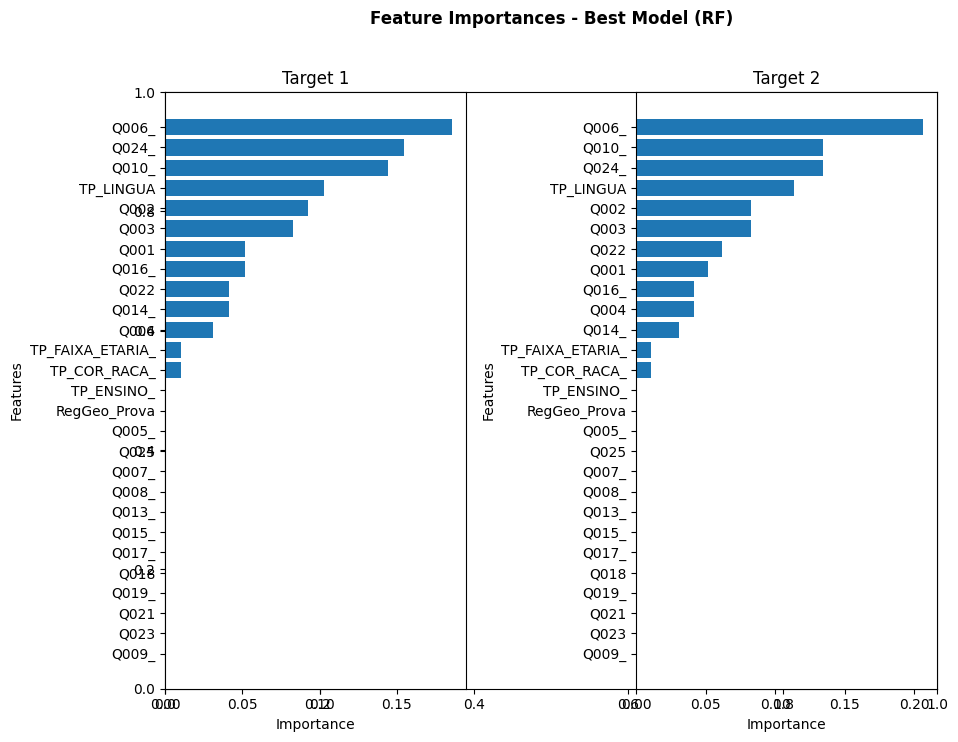

In [ ]:
plot_RF = plot_feature_importance(results_RanFore, 'Feature Importances - Best Model (RF)')
plot_RF

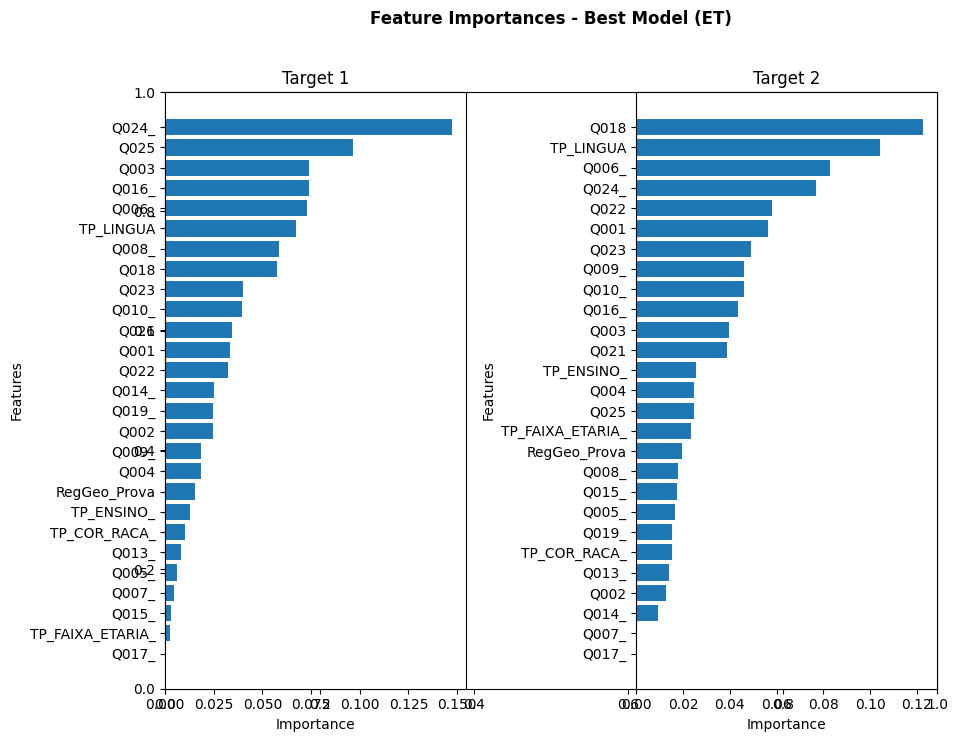

In [ ]:
plot_ET = plot_feature_importance(results_ExtTree, 'Feature Importances - Best Model (ET)')
plot_ET

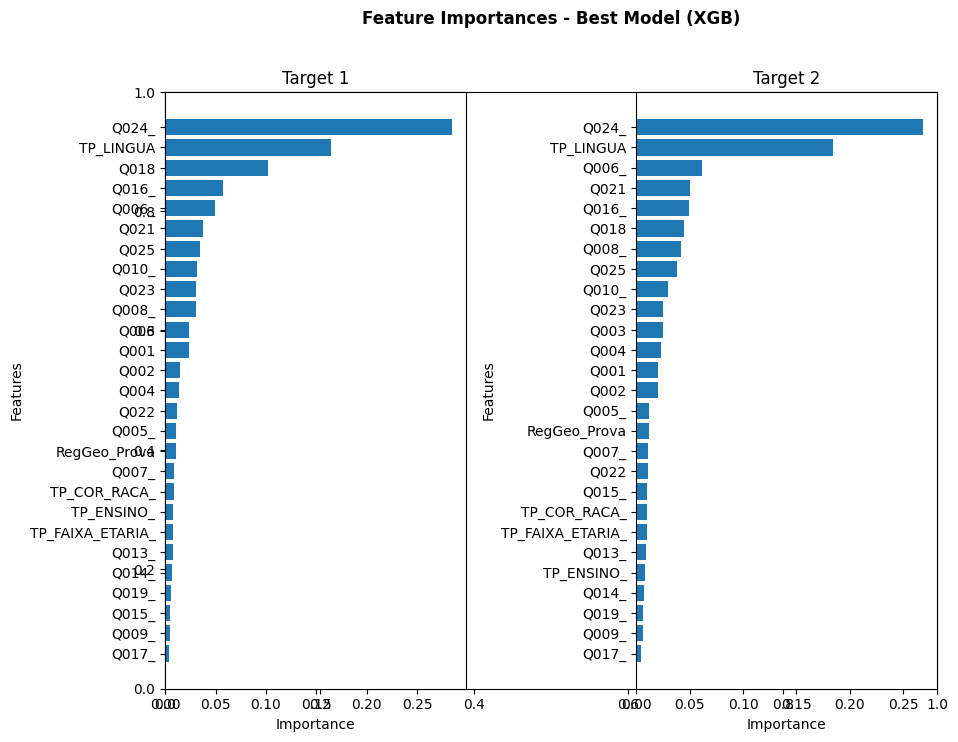

In [ ]:
plot_XGB = plot_feature_importance(results_XGBClas, 'Feature Importances - Best Model (XGB)')
plot_XGB